In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Converting IDX FILE TO NUMPY

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        if 'images' in filename:
            magic, num, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32).byteswap()
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols)
        else:
            magic, num = np.frombuffer(f.read(8), dtype=np.uint32).byteswap()
            data = np.frombuffer(f.read(), dtype=np.uint8)
    return data


In [3]:
X_train_path = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
y_train_path = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
X_test_path = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
Y_test_path = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'


X_train = read_idx(X_train_path)
Y_train = read_idx(y_train_path)
X_test = read_idx(X_test_path)
Y_test = read_idx(Y_test_path)


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
print(X_train[0])
print(Y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

# Visualize

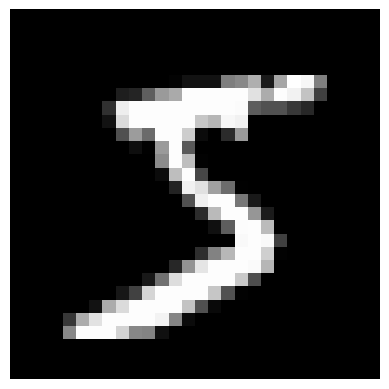

In [6]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray') 
plt.axis('off')
plt.show()

In [7]:
def plot_digit(image, label=None):
    if image.shape == (784,):
        image = image.reshape(28, 28)
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray') 
    plt.axis('off')
    if label is not None:
        plt.title(f"Label: {label}", fontsize=14)
    plt.show()


# Plotting first 5 Training Examples

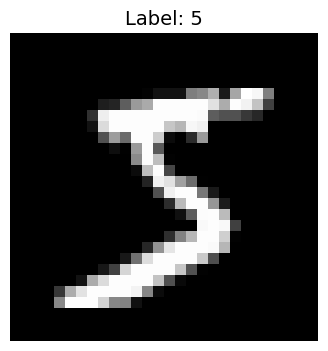

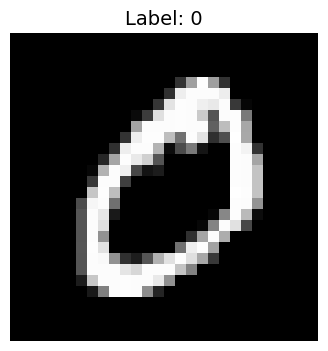

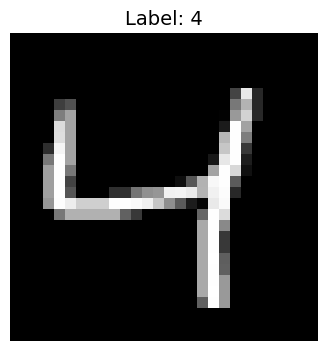

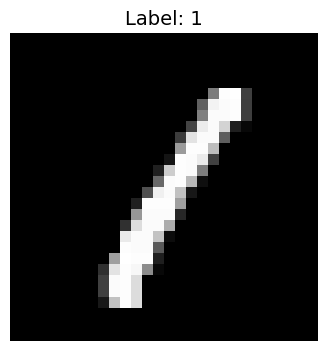

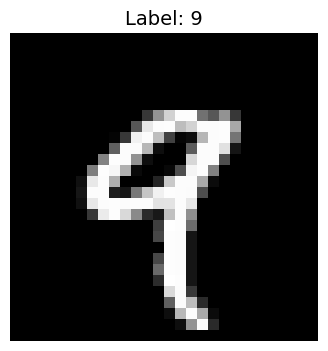

In [8]:
for i in range(5):
    plot_digit(X_train[i],Y_train[i]);

# Preprocessing Dataset

In [9]:
def preprocess_data(images, labels):
    images = images / 255.0
    labels_one_hot = np.zeros((labels.size, 10))
    labels_one_hot[np.arange(labels.size), labels] = 1
    return images, labels_one_hot

X_train, Y_train = preprocess_data(X_train, Y_train)
X_test, Y_test = preprocess_data(X_test, Y_test)

In [10]:
print(X_train[0])
print(Y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
class ANN:
    def __init__(self, n, hidden_layers, output_size):
        # n = 784 
        self.layers = [n] + hidden_layers + [output_size]
        self.weights = []
        self.biases = []
        
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2. / fan_in)
            self.weights.append(weight)
            self.biases.append(np.zeros((1, self.layers[i + 1])))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        activations = [X]
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            z = np.dot(activations[-1], w) + b
            a = self.relu(z)
            activations.append(a)
        
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        a = self.softmax(z)
        activations.append(a)
        return activations

    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m  # Add small value to avoid log(0)
        return loss

    def backward(self, activations, Y_true):
        gradients = {'dW': [], 'db': []}
        m = Y_true.shape[0]
        
        #output layer
        dz = activations[-1] - Y_true
        dw = np.dot(activations[-2].T, dz) / m
        db = np.sum(dz, axis=0, keepdims=True) / m
        gradients['dW'].insert(0, dw)
        gradients['db'].insert(0, db)
        
        #hidden layer
        for i in range(len(self.weights) - 2, -1, -1):
            dz = np.dot(dz, self.weights[i + 1].T) * self.relu_derivative(np.dot(activations[i], self.weights[i]) + self.biases[i])
            dw = np.dot(activations[i].T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m
            gradients['dW'].insert(0, dw)
            gradients['db'].insert(0, db)
        
        return gradients

    def update_parameters(self, gradients, lr):
        for i in range(len(self.weights)):
            self.weights[i] -= lr * gradients['dW'][i]
            self.biases[i] -= lr * gradients['db'][i]

    def train(self, X, Y, lr, epochs):
        for epoch in range(epochs):
            # Forward
            activations = self.forward(X)
            Y_pred = activations[-1]
            
            # loss
            loss = self.compute_loss(Y_pred, Y)
            
            # Backward
            gradients = self.backward(activations, Y)
            
            # Update
            self.update_parameters(gradients, lr)
            
      
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        activations = self.forward(X)
        predictions = np.argmax(activations[-1], axis=1)
        return predictions


In [12]:
n = 784         
hidden_layers = [128, 64,32] 
output_size = 10         

nn = ANN(n, hidden_layers, output_size)

lr = 0.1
epochs = 300
nn.train(X_train, Y_train, lr, epochs)


test_predictions = nn.predict(X_test)

accuracy = np.mean(test_predictions == np.argmax(Y_test, axis=1))
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 0, Loss: 2.4012
Epoch 10, Loss: 1.8350
Epoch 20, Loss: 1.2506
Epoch 30, Loss: 0.7856
Epoch 40, Loss: 0.6802
Epoch 50, Loss: 0.5428
Epoch 60, Loss: 0.4896
Epoch 70, Loss: 0.4318
Epoch 80, Loss: 0.4522
Epoch 90, Loss: 0.3594
Epoch 100, Loss: 0.3371
Epoch 110, Loss: 0.3257
Epoch 120, Loss: 0.3315
Epoch 130, Loss: 0.3066
Epoch 140, Loss: 0.2888
Epoch 150, Loss: 0.2796
Epoch 160, Loss: 0.2718
Epoch 170, Loss: 0.2651
Epoch 180, Loss: 0.2593
Epoch 190, Loss: 0.2544
Epoch 200, Loss: 0.2506
Epoch 210, Loss: 0.2462
Epoch 220, Loss: 0.2401
Epoch 230, Loss: 0.2342
Epoch 240, Loss: 0.2294
Epoch 250, Loss: 0.2251
Epoch 260, Loss: 0.2213
Epoch 270, Loss: 0.2176
Epoch 280, Loss: 0.2142
Epoch 290, Loss: 0.2109
Test Accuracy: 93.83%


In [ ]:
 plot_decision_boundary(ann, X_test, y_test)